# Imports

In [45]:
import pandas as pd
from scipy import stats

# visualisation
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns
import plotly.graph_objects as go

# custom functions
from functions import plot_scatterplot, plot_boxplot

# Contents:

1. [Data Description](#Data-Description)
2. [Data Preprocessing](#Data-Preprocessing)
    - [NaN-Cleaning](#NaN-Cleaning)
    - [Outliers detection and Normalization](#Outliers-detection-and-Normalization)
    - [Duplicate data](#Duplicate-data)
    - [Spatial distribution](#Spatial-distribution)
3. [Metrics Analysis](#Metrics-Analysis)

# Data Description

In [2]:
world_metrics_path = "C:\\Users\\paula\\Desktop\\M2\\ML\\Project\\what_makes_us_happy-main\\data\\world_metrics.csv"
world_metrics = pd.read_csv(world_metrics_path)

In [3]:
world_metrics

country  life_expect  life_exp60  adult_mortality  infant_mort  \
0          Angola     62.63262    17.34829        237.96940     0.057900   
1         Burundi     60.09811    16.59126        290.18580     0.052420   
2           Benin     61.08568    17.20543        242.37410     0.066690   
3    Burkina Faso     60.32101    15.48575        254.60270     0.055795   
4        Botswana     66.05297    17.42258        249.24130     0.032560   
..            ...          ...         ...              ...          ...   
132   New Zealand     82.24739    25.29202         66.05728     0.003975   
133         Japan     84.16616    26.39402         50.82619     0.001980   
134      Cambodia     69.36723    17.36710        170.49700     0.027600   
135   South Korea     82.66409    25.26966         60.81405     0.002955   
136          Laos     65.79089    16.83024        192.79390     0.051895   

     age1-4mort  alcohol   bmi  basic_water  pop_mils  ...  pf_identity  \
0      0.007520  5.38006  23.3     55.08428     20.82  ...     7.500000   
1      0.006450  3.88586  21.7     60.20415      9.85  ...     5.833333   
2      0.009390  1.46034  23.5     66.32024     10.05  ...    10.000000   
3      0.008635  7.10585  22.2     48.26772     16.46  ...    10.000000   
4      0.002040  5.14197  24.3     89.40444      2.00  ...     4.250000   
..          ...      ...   ...          ...       ...  ...          ...   
132    0.000235  9.01749  28.0    100.00000      4.46  ...     9.250000   
133    0.000195  6.81588  22.7     98.97000    127.25  ...     9.250000   
134    0.001110  3.50125  22.2     76.94537     14.86  ...     8.333333   
135    0.000125  8.68600  23.8     99.67540     49.00  ...     9.250000   
136    0.003990  7.11148  22.9     79.94190      6.65  ...    10.000000   

     pf_score  ef_government  ef_legal  ef_money  ef_trade  ef_regulation  \
0    6.111324       6.496685  2.963635  5.606605  5.264754       5.518500   
1    4.414134       6.115441  3.495487  7.585471  6.110770       6.271879   
2    7.496976       6.182575  3.822761  7.013885  6.026546       6.855929   
3    7.455340       5.405462  3.687657  7.121434  6.604145       7.427554   
4    6.876334       6.702038  5.950516  9.056783  7.679525       7.769777   
..        ...            ...       ...       ...       ...            ...   
132  9.284819       6.476854  8.715280  9.455372  8.635971       9.159782   
133  8.733771       4.535268  7.586987  9.524659  7.495839       8.197000   
134  7.238448       7.897867  4.277907  9.308534  7.324052       7.061529   
135  8.766350       6.826429  6.391154  9.609132  7.569457       7.243194   
136  5.863586       7.840113  5.937201  7.335899  6.830397       6.590033   

     ef_score  hf_score  happiness_score  
0        5.17  5.640662            3.866  
1        5.92  5.167067            2.905  
2        5.98  6.738488            3.484  
3        6.05  6.752670            3.739  
4        7.43  7.153167            3.974  
..        ...       ...              ...  
132      8.49  8.887410            7.334  
133      7.47  8.101885            5.921  
134      7.17  7.204224            3.907  
135      7.53  8.148175            5.835  
136      6.91  6.386793            4.876  

[137 rows x 30 columns]

1. Dataset `world_metrics` contains information on health and life expectancy data, ecological footprint, human freedom scores, and happiness scores for 137 countries in 2016.
2. It provides statistics for 29 different features. The full list of them (+ the corresponding description) is presented below:

| N | feature | description |
|---|---|---|
| 1 | `country` | Country name |
| 2 | `life_expect` | Life expectancy at birth (years) |
| 3 | `life_exp60` | Life expectancy at age 60 (years) |
| 4 | `adult_mortality` | Adult (15 to 60 years) Mortality Rates (per 1000 population) |
| 5 | `infant_mort` | Death rate up to age 1 |
| 6 | `age1-4mort` | Death rate between ages 1 and 4 |
| 7 | `alcohol` | Alcohol consumption per capita (15+, in litres of pure alcohol) |
| 8 | `bmi` | Mean BMI (kg/m^2) (18+, age-standardized estimate) |
| 9 | `basic_water` | Population using at least basic drinking-water services |
| 10 | `pop_mils` | Population (millions) |
| 11 | `development_index` | Human Development Index |
| 12 | `gdp_per_capita` | Gross Domestic Product per capita (dollars) |
| 13 | `eco_footprint` | Use of ecological assets (measured in gha per person) |
| 14 | `biocapacity` | Productivity of ecological assets (measured in gha per person) |
| 15 | `deficit_or_reserve` | Biocapacity Deficit or Reserve (measured in gha per person) |
| 16 | `pf_rol` | Personal Freedom score (Rule of Law) |
| 17 | `pf_ss` | Personal Freedom score (Security and Safety) |
| 18 | `pf_movement` | Personal Freedom score (Movement) |
| 19 | `pf_religion` | Personal Freedom score (Religion) |
| 20 | `pf_expression` | Personal Freedom score (Expression and Information) |
| 21 | `pf_identity` | Personal Freedom score (Identity and Relationships) |
| 22 | `pf_score` | General Personal Freedom score |
| 23 | `ef_government` | Economic Freedom score (Size of Government) |
| 24 | `ef_legal` | Economic Freedom score (Legal System and Property Rights) |
| 25 | `ef_money` | Economic Freedom score (Access to Sound Money) |
| 26 | `ef_trade` | Economic Freedom score (Freedom to Trade Internationally) |
| 27 | `ef_regulation` | Economic Freedom score (Regulation of Credit, Labor, and Business) |
| 28 | `ef_score` | General Economic Freedom score |
| 29 | `hf_score` | General Human Freedom score |
| 30 | `happiness_score` | Ladder score (between 10 (best) and 0 (worst) possible life) |


3. All features (except for countries names) takes the float values.
4. **The question of interest: which factors have the most prominent effect on happiness levels.**
5. Sources:
    - Features 1 - 9 are retrieved from [WHO National Life Expectancy](https://www.kaggle.com/datasets/mmattson/who-national-life-expectancy).
    - Features 10 - 15 are retrieved from [2016 Global Ecological Footprint](https://www.kaggle.com/footprintnetwork/ecological-footprint).
    - Features 16 - 29 are retrieved from [The Human Freedom Index](https://www.kaggle.com/datasets/gsutters/the-human-freedom-index).
    - Feature 30 is retrieved from [World Happiness Report](https://www.kaggle.com/unsdsn/world-happiness).
    - More information about data sources can be found [here](https://www.kaggle.com/code/dariasvasileva/merging-world-metrics-sets/notebook).

However, after this brief dataset introduction we already have a couple of questions:

1. Should we augmentate the dataset with more countries? 
2. Should we augmentate the dataset with more years?

# Data Preprocessing

## NaN-Cleaning

In [4]:
world_metrics.isna().sum()

country               0
life_expect           0
life_exp60            0
adult_mortality       0
infant_mort           0
age1-4mort            0
alcohol               0
bmi                   0
basic_water           0
pop_mils              0
development_index     0
gdp_per_capita        0
eco_footprint         0
biocapacity           0
deficit_or_reserve    0
pf_rol                0
pf_ss                 0
pf_movement           0
pf_religion           0
pf_expression         0
pf_identity           0
pf_score              0
ef_government         0
ef_legal              0
ef_money              0
ef_trade              0
ef_regulation         0
ef_score              0
hf_score              0
happiness_score       0
dtype: int64

The initial dataset is clean. We do not have any `NaN` values.

## Outliers detection

We need to identify any outliers in the dataset and remove them, as they may have an adverse effect on our analysis or modeling later. However, removing outliers can also affect the statistical properties of the dataset. So, we need to understand the nature of these values better.

Scaling can help to reduce the influence of outliers.

Let us start with visual representation of our features. To identify possible outliers we need to plot scatterplots. We first step is to prepare the dataaet without categorical values (column "country"):

In [5]:
world_metrics_numerical_features = world_metrics.drop(columns=["country"])

We want to plot scatterplots because they allow to get the visual representation of each metric. We will count a data point as an outlier if it appear far away from the main bulk of the data. Using scatterplots we are also able to pre-dentify possible clusters.

We will use a function `plot_scatterplot` that we defined in a separate file `functions.py`. This function allows to plot scatterplots using a certain dataset, as well as other parameters as arguments. For the detailed view of each function check the corresponfing file in the GitHub page. Before runnig the notebook, be sure that `functions.py` is located in the same folder as the notebook.

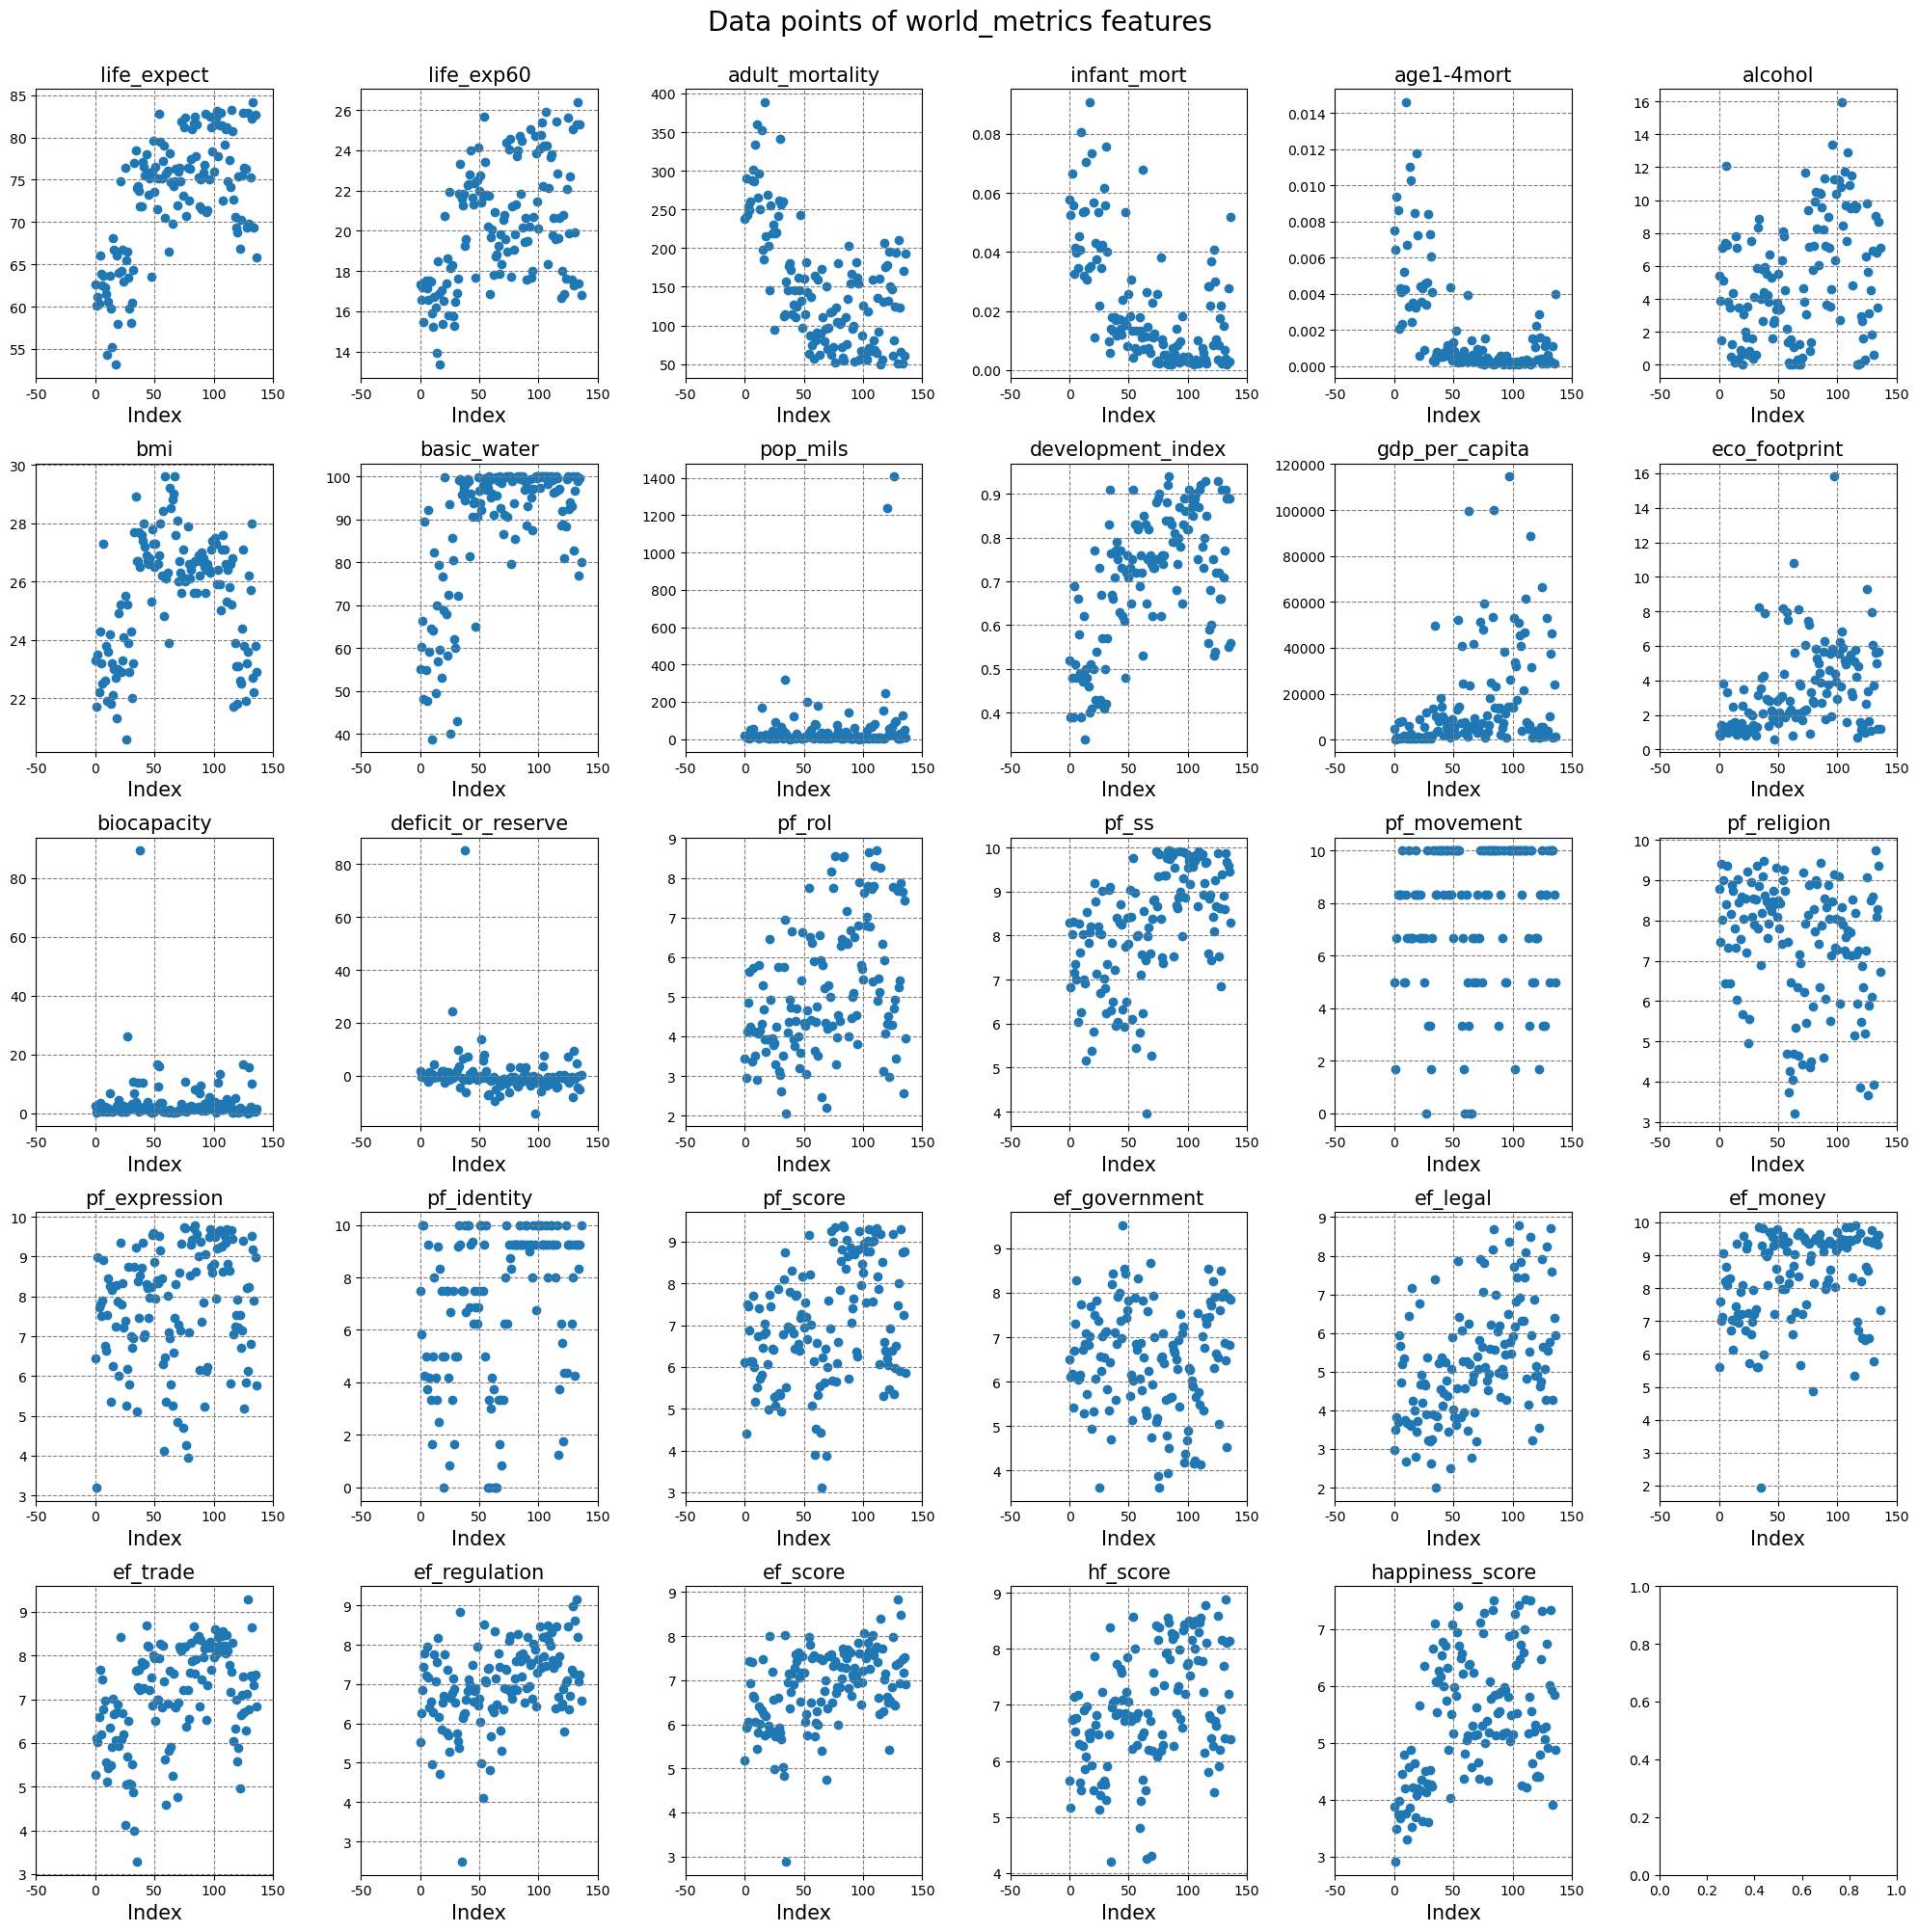

In [6]:
plot_scatterplot(dataset=world_metrics_numerical_features,
                 title="Data points of world_metrics features",
                 title_fontsize=20, ax_fontsize=15,
                 fig_width=20, fig_height=20, nrows=5, ncols=6)

If we look at each of the presented scatterplots, we will notice that, indeed, some features are have outliers. Below are the list of the metrics that do have outliers based on our first glance at this graph. 

- `adult_mortality`
- `infant_mort`
- `age1-4mort`
- `basic_water`
- `pop_mils`
- `gdp_per_capita`
- `eco_footprint`
- `biocapacity`
- `deficit_or_reserve`
- `pf_ss`
- `ef_money`
- `ef_regulation`
- `ef_score`

To validate that we do not have any other metrics with outliers, we will plot the box plot from the same `functions.py` file called `plot_boxplot`. Again, be sure that this file is located in the same folder on your local machine as this notebook.

Boxplot is another way (perhaps, even more effective) to visualize the distribution of a data and identify the presence of outliers. A brief explanation of boxplot elements:
- The central box represents the middle 50% of the data. It restricts the data from lower Q1 to upper Q3 (interquartile range)
- The orange horizontal lie inside the central box is the median. 
- The whiskers (lines extending from the box) represent the range of the data outside the middle 50%.
- Outliers are the data points that fall beyond the whiskers, which depicted with small circles.

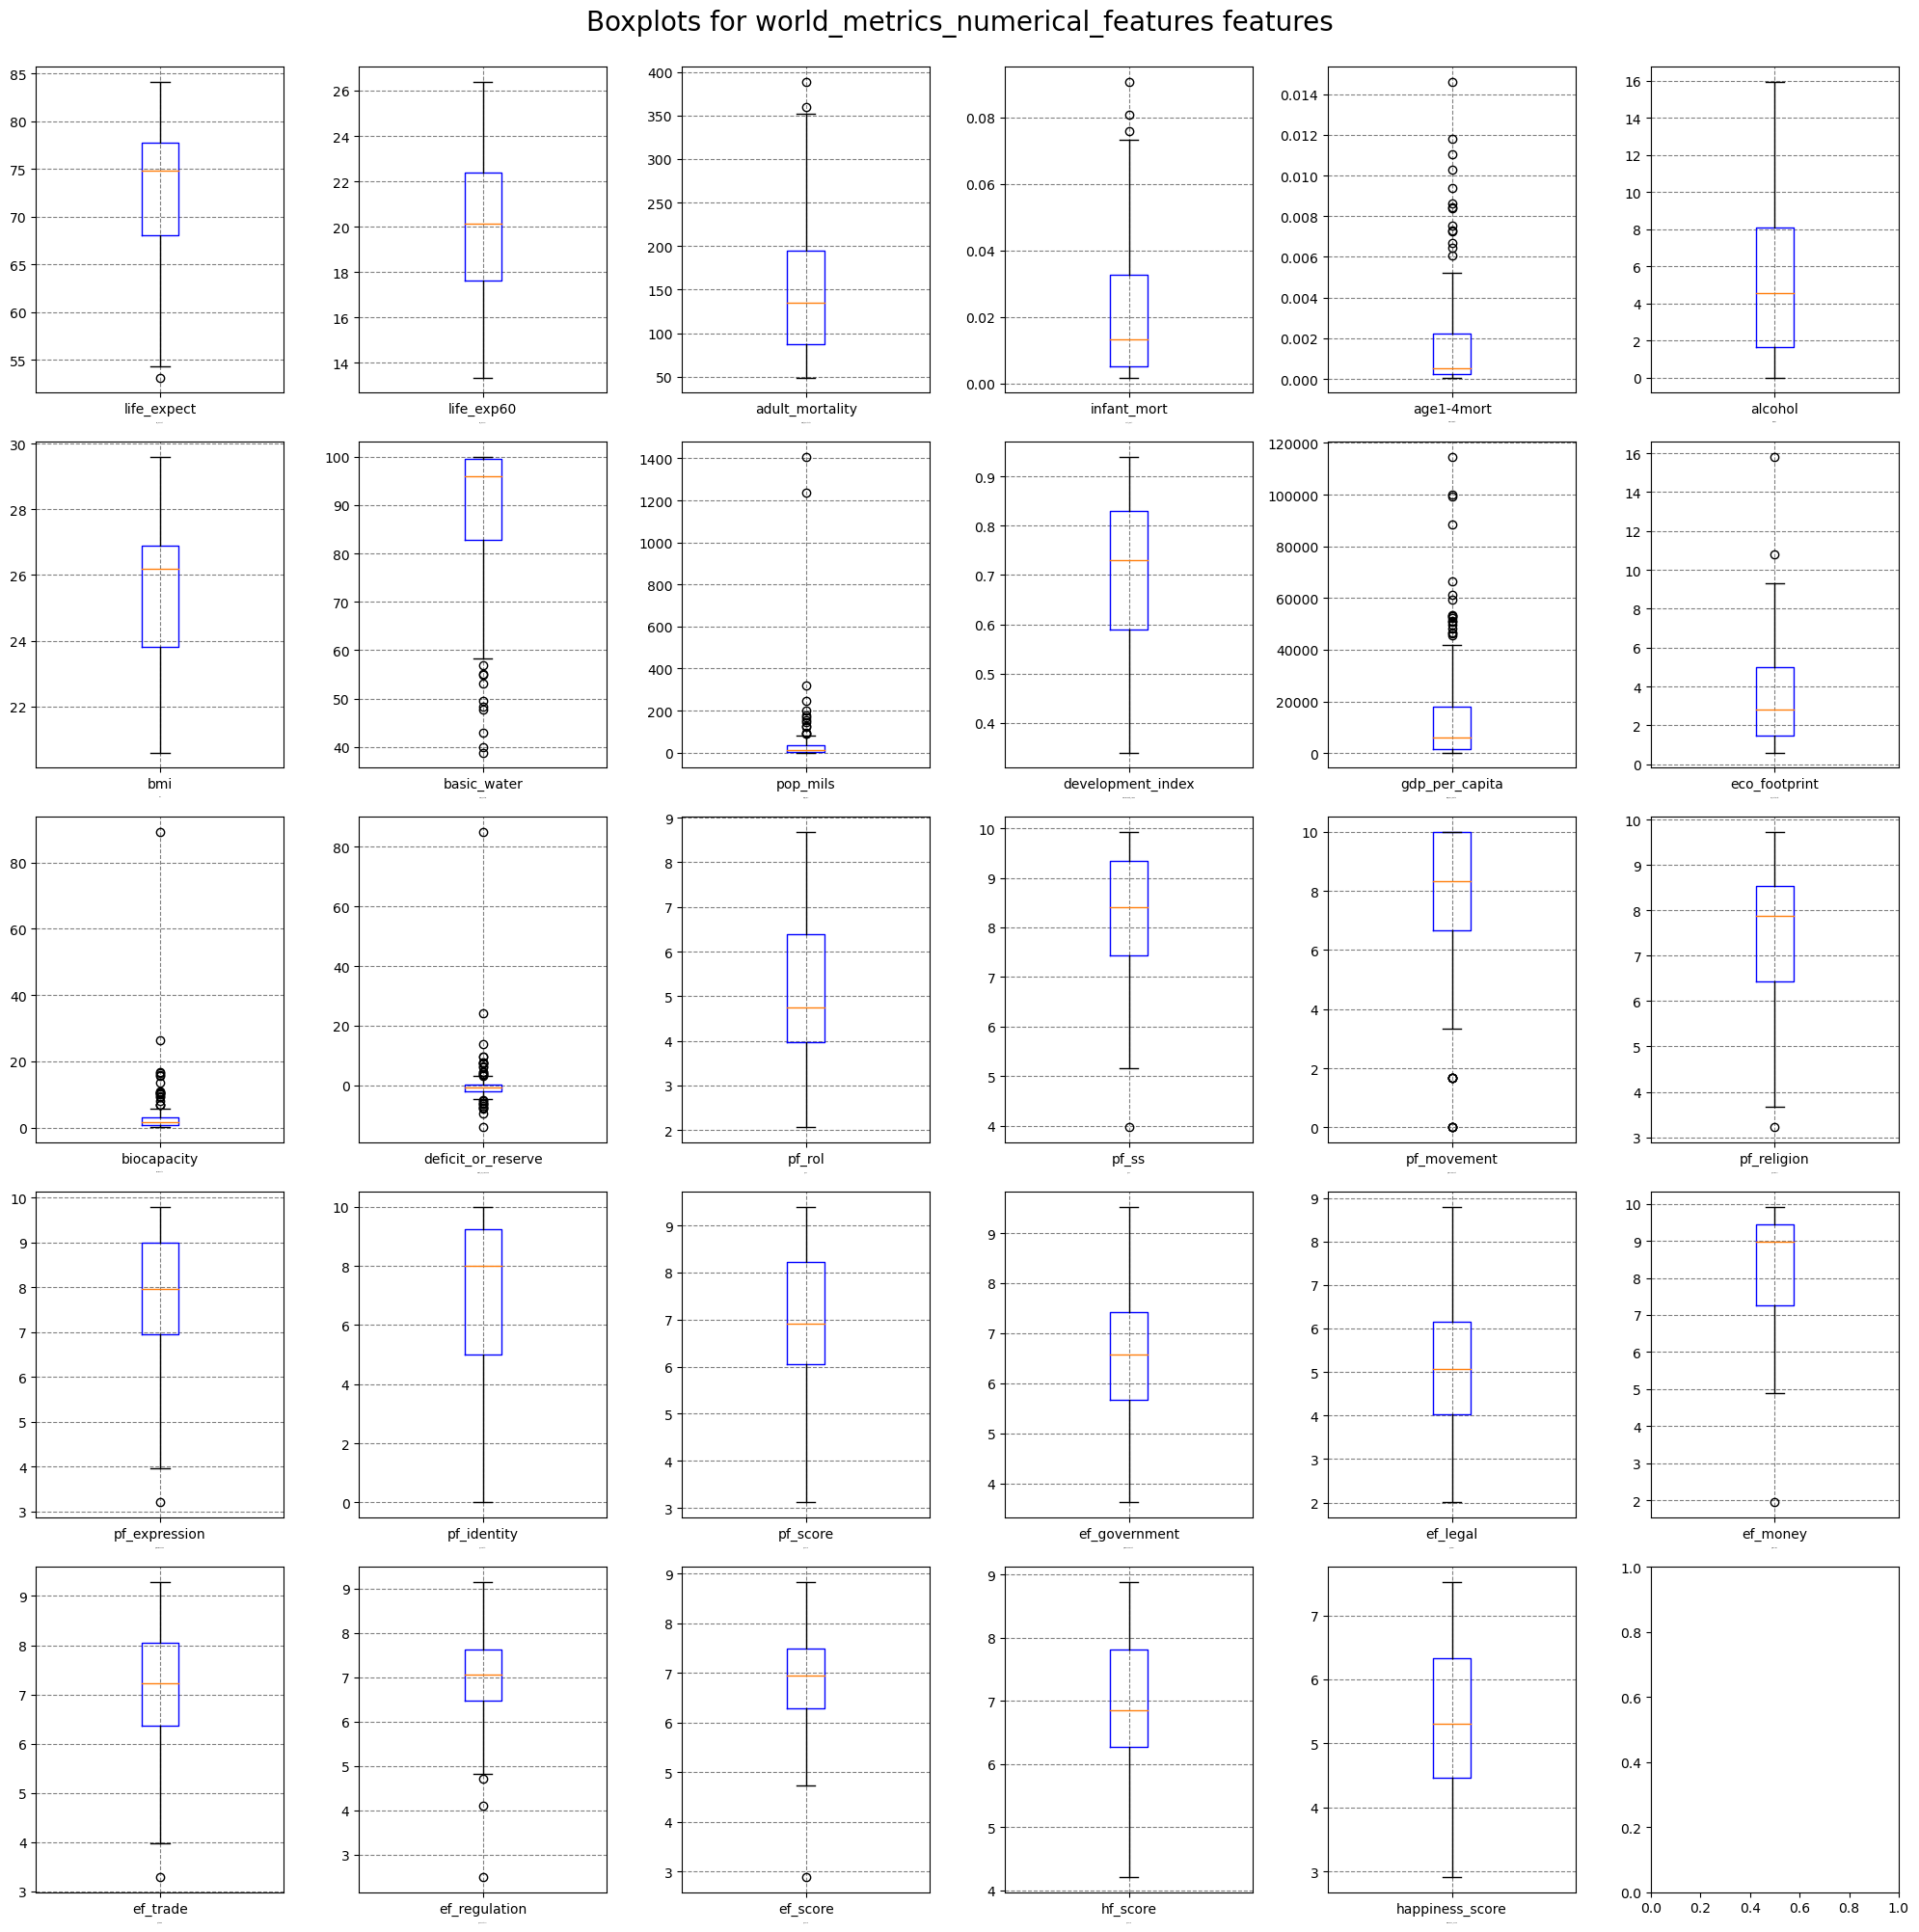

In [7]:
plot_boxplot(dataset=world_metrics_numerical_features,
             title="Boxplots for world_metrics_numerical_features features",
             title_fontsize=20, ax_fontsize=0,
             fig_width=20, fig_height=20, nrows=5, ncols=6)

In fact, we do have more "outlierd metrics" than we assumed. Here are the full list of such features. We highlighted the missing "outlierd metrics" in bold.

- **`life_expect`**
- `adult_mortality`
- `infant_mort`
- `age1-4mort`
- `basic_water`
- `pop_mils`
- `gdp_per_capita`
- `eco_footprint`
- `biocapacity`
- `deficit_or_reserve`
- `pf_ss`
- **`pf_movement`**
- **`pf_religion`**
- **`pf_expression`**
- `ef_money`
- **`ef_trade`**
- `ef_regulation`
- `ef_score`

Some metrics are significantly skewed. It can be seen from the size of the central box and the presence + the amount of outliers. For example, the mean of `adult_mortality` is 1.1 higher than its median. The mean of children mortality (`age1-4mort`) is 3.4 times higher than the median. The mean of population (`pop_mils`) is 4.5 higher than its median. The same relations are in the `gdp_per_capita` (2.7), `eco_footprint` (1.2), `biocapacity` (2.4). 

In this case (the mean is greater than the median), we can indicate that the distribution is positevely (to the right) skewed, so the data is more on the lower side (which is quite obviously from the locations of central boxes)

One can also find the opposite relations: the median of `life_expect` is 1.03 higher than its mean, the median of `basic_water` is 1.09 higher than its mean. The same trend is for `pf_ss` (1.02), `pf_movement` (1.09), `pf_religion` (1.06), `pf_expression` (1.03), `ef_money` (1.07), `ef_trade` (1.02), `ef_regulation` (1.01), `ef_score` (1.02).

In contrast, when the median is higher than the mean, the data distribution is negatively (to the left) skewed. In such cases, the tail end is extending towards the left along the x-axis (i.e., less observations in the lower values), while the peak of the curve is towards the right (i.e., more observations in the upper values).

The summary description of the entire dataset is presented below:

In [8]:
world_metrics.describe()

life_expect  life_exp60  adult_mortality  infant_mort  age1-4mort  \
count   137.000000  137.000000       137.000000   137.000000  137.000000   
mean     72.962743   20.262010       150.254420     0.021038    0.001848   
std       7.307447    3.026119        78.374564     0.020495    0.002789   
min      53.130500   13.349510        49.201850     0.001790    0.000070   
25%      68.039250   17.609330        87.429160     0.005000    0.000240   
50%      74.843090   20.117140       135.341100     0.013175    0.000545   
75%      77.762060   22.390870       194.952800     0.032560    0.002235   
max      84.166160   26.394020       388.805700     0.090800    0.014615   

          alcohol         bmi  basic_water     pop_mils  development_index  \
count  137.000000  137.000000   137.000000   137.000000         137.000000   
mean     5.167943   25.525547    88.432938    49.495737           0.704919   
std      3.803661    2.064334    15.825358   163.299515           0.155286   
min      0.000910   20.600000    38.852590     0.520000           0.340000   
25%      1.619590   23.800000    82.800580     4.800000           0.590000   
50%      4.538300   26.200000    95.992400    10.880000           0.730000   
75%      8.100000   26.900000    99.586750    36.350000           0.830000   
max     15.950260   29.600000   100.000000  1408.040000           0.940000   

       ...  pf_identity    pf_score  ef_government    ef_legal    ef_money  \
count  ...   137.000000  137.000000     137.000000  137.000000  137.000000   
mean   ...     7.034063    7.054373       6.506282    5.235571    8.352036   
std    ...     2.968634    1.418618       1.225005    1.530037    1.377262   
min    ...     0.000000    3.116028       3.616782    2.002915    1.942101   
25%    ...     5.000000    6.059028       5.664386    4.030095    7.258295   
50%    ...     8.000000    6.920446       6.576430    5.071814    8.971846   
75%    ...     9.250000    8.216035       7.430474    6.158069    9.432830   
max    ...    10.000000    9.398842       9.528485    8.798181    9.922187   

         ef_trade  ef_regulation    ef_score    hf_score  happiness_score  
count  137.000000     137.000000  137.000000  137.000000       137.000000  
mean     7.072647       6.997985    6.832847    6.943610         5.416920  
std      1.156196       1.007888    0.876275    1.044965         1.124471  
min      3.281311       2.483540    2.880000    4.200724         2.905000  
25%      6.355515       6.475280    6.290000    6.274969         4.459000  
50%      7.217833       7.058349    6.950000    6.848010         5.303000  
75%      8.050141       7.632668    7.490000    7.811560         6.324000  
max      9.291177       9.159782    8.840000    8.887410         7.526000  

[8 rows x 29 columns]

The question is: what should we do with all these outliers?

There are several ways how to deal with this issue:

1. **Removal**: to drop outliers from the dataset. 
    - Pros:
        * Very easy and straightforward approach;
        * Can increase the model permormace at the end. 
    - Cons: 
        * Can result in the loss of valuable information;
        * Can change the distribution of the data.

2. **Trimming**: to remove *a certain percentage of the data* from both the lower and upper ends of the distribution. 
    - Pros:
        * Less extreme than removal.
    - Cons:
        * Can still result in the loss of valuable information;
        * Can still change the distribution of the data.

3. **Winsorization**: to replace the outliers with the nearest non-outlier values.
    - Pros:
        * Can be effective in reducing the impact of outliers without losing information;
        * Does not change the distribution of the data. 
    - Cons:
        * Can be difficult to determine the appropriate replacement values;
        * Creates artificial values in the dataset.

4. **Transformations**: to normalize the distribution using math fubctions.
    - Pros:
        * Allows not to lose information;
        * Does not require the removal or replacement of data. 
    - Cons:
        * Can be difficult to determine the appropriate transformation;
        * Can also change the interpretation of the data.

5. **Robust statistics**: to use statistical methods that are less sensitive to outliers.
    - Pros:
        * Allows not to lose information;
        * Straightforward approach.
    - Cons: 
        * Can result in a loss of precision;
        * Can also change the interpretation of the data.

6. **Keep outliers**
    - Pros:
        * Super straigtforward approach;
    - Cons:
        * Can result in a loss of precision;
        * Can also change the interpretation of the data.

So, each of this approach has its own advantages and disadvantages. Ultimately, the choice of strategy depends on our data and the objectives of the analysis.

For this moment let us keep all the ouliers. In case of bad model performance we will change the approach.

## Duplicate data

Redundant data can cause overfitting, that can skew the results later.

We need to be sure that each country appear only once. So, let us check if there are some duplicates among the rows in the `world_metrics`:

In [9]:
duplicates = world_metrics.duplicated()

print("Number of duplicate rows:", duplicates.sum())

Number of duplicate rows: 0


Cool! We do not have any duplicted rows!

## Spatial distribution

Our dataset contains a data for 137 countries and 29 different features. Let us find out what countries do not present.

First, we need to retrieve a list of countries that are in the dataset:

In [10]:
world_metrics_countries = world_metrics['country'].unique()

After that, we need to work with the list `countries_list` that contains all states exist today**. We want to transform it into a dataframe, and mark with Boolean values (i.e. True or False) which countries do we have in the `world_metrics` dataset:

** The list of countries is taken from [here](https://gist.github.com/kalinchernev/486393efcca01623b18d#file-countries) and updated manually.

In [11]:
regions_list = ["Afghanistan", "Albania", "Algeria", "Andorra", "Angola", "Antigua & Deps", "Antigua and Barbuda", "Argentina", "Armenia", 
                "Australia", "Austria", "Azerbaijan", "Bahamas", "Bahrain", "Bangladesh", "Barbados", "Belarus", 
                "Belgium", "Belize", "Benin", "Bhutan", "Bolivia", "Bosnia and Herzegovina", "Botswana", "Brazil", 
                "Brunei", "Brunei Darussalam", "Bulgaria", "Burkina Faso", "Burundi", "Cambodia", "Cameroon", "Canada", "Cape Verde", "Cabo Verde",
                "Central African Republic", "Chad", "Chile", "China", "Colombia", "Comoros", "Democratic Republic of the Congo", 
                "Congo Republic", "Costa Rica", "Croatia", "Cuba", "Cyprus", "Czech Republic", "Denmark", "Djibouti",
                "Dominica", "Dominican Republic", "East Timor", "Ecuador", "Egypt", "El Salvador", "Equatorial Guinea", 
                "Eritrea", "Estonia", "Ethiopia", "Fiji", "Falkland Islands", "Finland", "France", "French Southern and Antarctic Lands", 
                "Gabon", "Gambia", "Georgia", "Germany", "Ghana", "Greece", "Greenland", "Grenada", "Guatemala", "Guinea", 
                "Guinea-Bissau", "Guyana", "Haiti", "Honduras", "Hungary", "Iceland", "India", "Indonesia", "Iran", 
                "Iraq", "Ireland", "Israel", "Italy", "Ivory Coast", "Côte d'Ivoire", "Jamaica", "Japan", "Jordan", 
                "Kazakhstan", "Kenya", "Kiribati", "Kosovo", "North Korea ", "South Korea", "Kosovo", "Kuwait", "Kyrgyz Republic", 
                "Laos", "Latvia", "Lebanon", "Lesotho", "Liberia", "Libya", "Liechtenstein", "Lithuania", 
                "Luxembourg", "Macedonia", "Madagascar", "Malawi", "Malaysia", "Maldives", "Mali", "Malta", 
                "Marshall Islands", "Mauritania", "Mauritius", "Mexico", "Micronesia", "Moldova", "Monaco", 
                "Mongolia", "Montenegro", "Morocco", "Mozambique", "Myanmar", "Namibia", "Nauru", 
                "Nepal", "Netherlands", "New Zealand", "New Caledonia", "Nicaragua", "Niger", "Nigeria", "Norway", "Oman", 
                "Pakistan", "Palau", "Panama", "Papua New Guinea", "Paraguay", "Peru", "Philippines", "Poland", 
                "Portugal", "Puerto Rico", "Qatar", "Romania", "Russia", "Rwanda", "St Kitts & Nevis", "St Lucia", 
                "Saint Vincent & the Grenadines", "Samoa", "San Marino", "Sao Tome & Principe", "Saudi Arabia", 
                "Senegal", "Serbia", "Seychelles", "Sierra Leone", "Singapore", "Slovakia", "Slovenia", 
                "Solomon Islands", "Somalia", "South Africa", "South Sudan", "Spain", "Sri Lanka", "Sudan", 
                "Suriname", "Swaziland", "Sweden", "Switzerland", "Syria", "Syrian Arab Republic", "Taiwan", "Tajikistan", "Tanzania", 
                "Thailand", "Togo", "Tonga", "Trinidad & Tobago", "Tunisia", "Turkey", "Turkmenistan", "Tuvalu", 
                "Uganda", "Ukraine", "United Arab Emirates", "United Kingdom", "United States", "Uruguay", 
                "Uzbekistan", "Vanuatu", "Vatican City", "Venezuela", "Vietnam", "Yemen", "Zambia", "Zimbabwe"]

In [12]:
countries = pd.DataFrame(regions_list, columns=['country'])

countries['is_in_world_metrics'] = countries['country'].isin(world_metrics_countries)
countries.head(5)

country  is_in_world_metrics
0  Afghanistan                False
1      Albania                 True
2      Algeria                 True
3      Andorra                False
4       Angola                 True

Now, we need to use the following piece of code to be able to plot the interactive map:

```python
import plotly.express as px
```

In [13]:
fig = px.choropleth(data_frame=countries,
                    locations="country",
                    locationmode="country names",
                    color="is_in_world_metrics",
                    color_discrete_map={True: "lightgreen", False: "pink"})
fig.show()

From the map above, one can see that the dataset represents data from all over the world, with mostly missing countries from Africa, and middle East. Hence, **our potential results migh be significantly biased since they will not illustrate the relations between different factors and happiness score from under-developed and developing countries**.

Below, we plotted the interactive scatterplot with happiness scores by country.

In [14]:
happiness_score_sorted = world_metrics.sort_values('happiness_score', ascending=True)
fig = px.scatter(happiness_score_sorted, x='happiness_score', y='country', hover_name='country')

fig.update_layout(
    title='Happiness Scores by Country',
    xaxis_title='Happiness Score',
    yaxis_title='Country Name',
    yaxis_tickfont={'size': 8},
    xaxis_tickfont={'size': 8},
    width=1000,
    height=1000)

fig.show()

# Metrics Analysis

In the dataset we have 30 features in total: one of them is country names, another one is happiness scores that are important for us to perform a clustering analysis, and the rest 28 features will be used as an input in our future model. However, we believe that 28 metrics is too much, so we want to find correlation levels between each metric and happiness score.

First, let us create a subset of the initial dataset that will contain features only (i.e., without country names):

In [15]:
world_metrics_features = world_metrics.iloc[:, 1:30]

Then, we need to plot scatteplots with our target feature on x-ax, and other metrics on y-ax.

Apart from that, we want to plot a regression line that would approximate the relationship between two features.

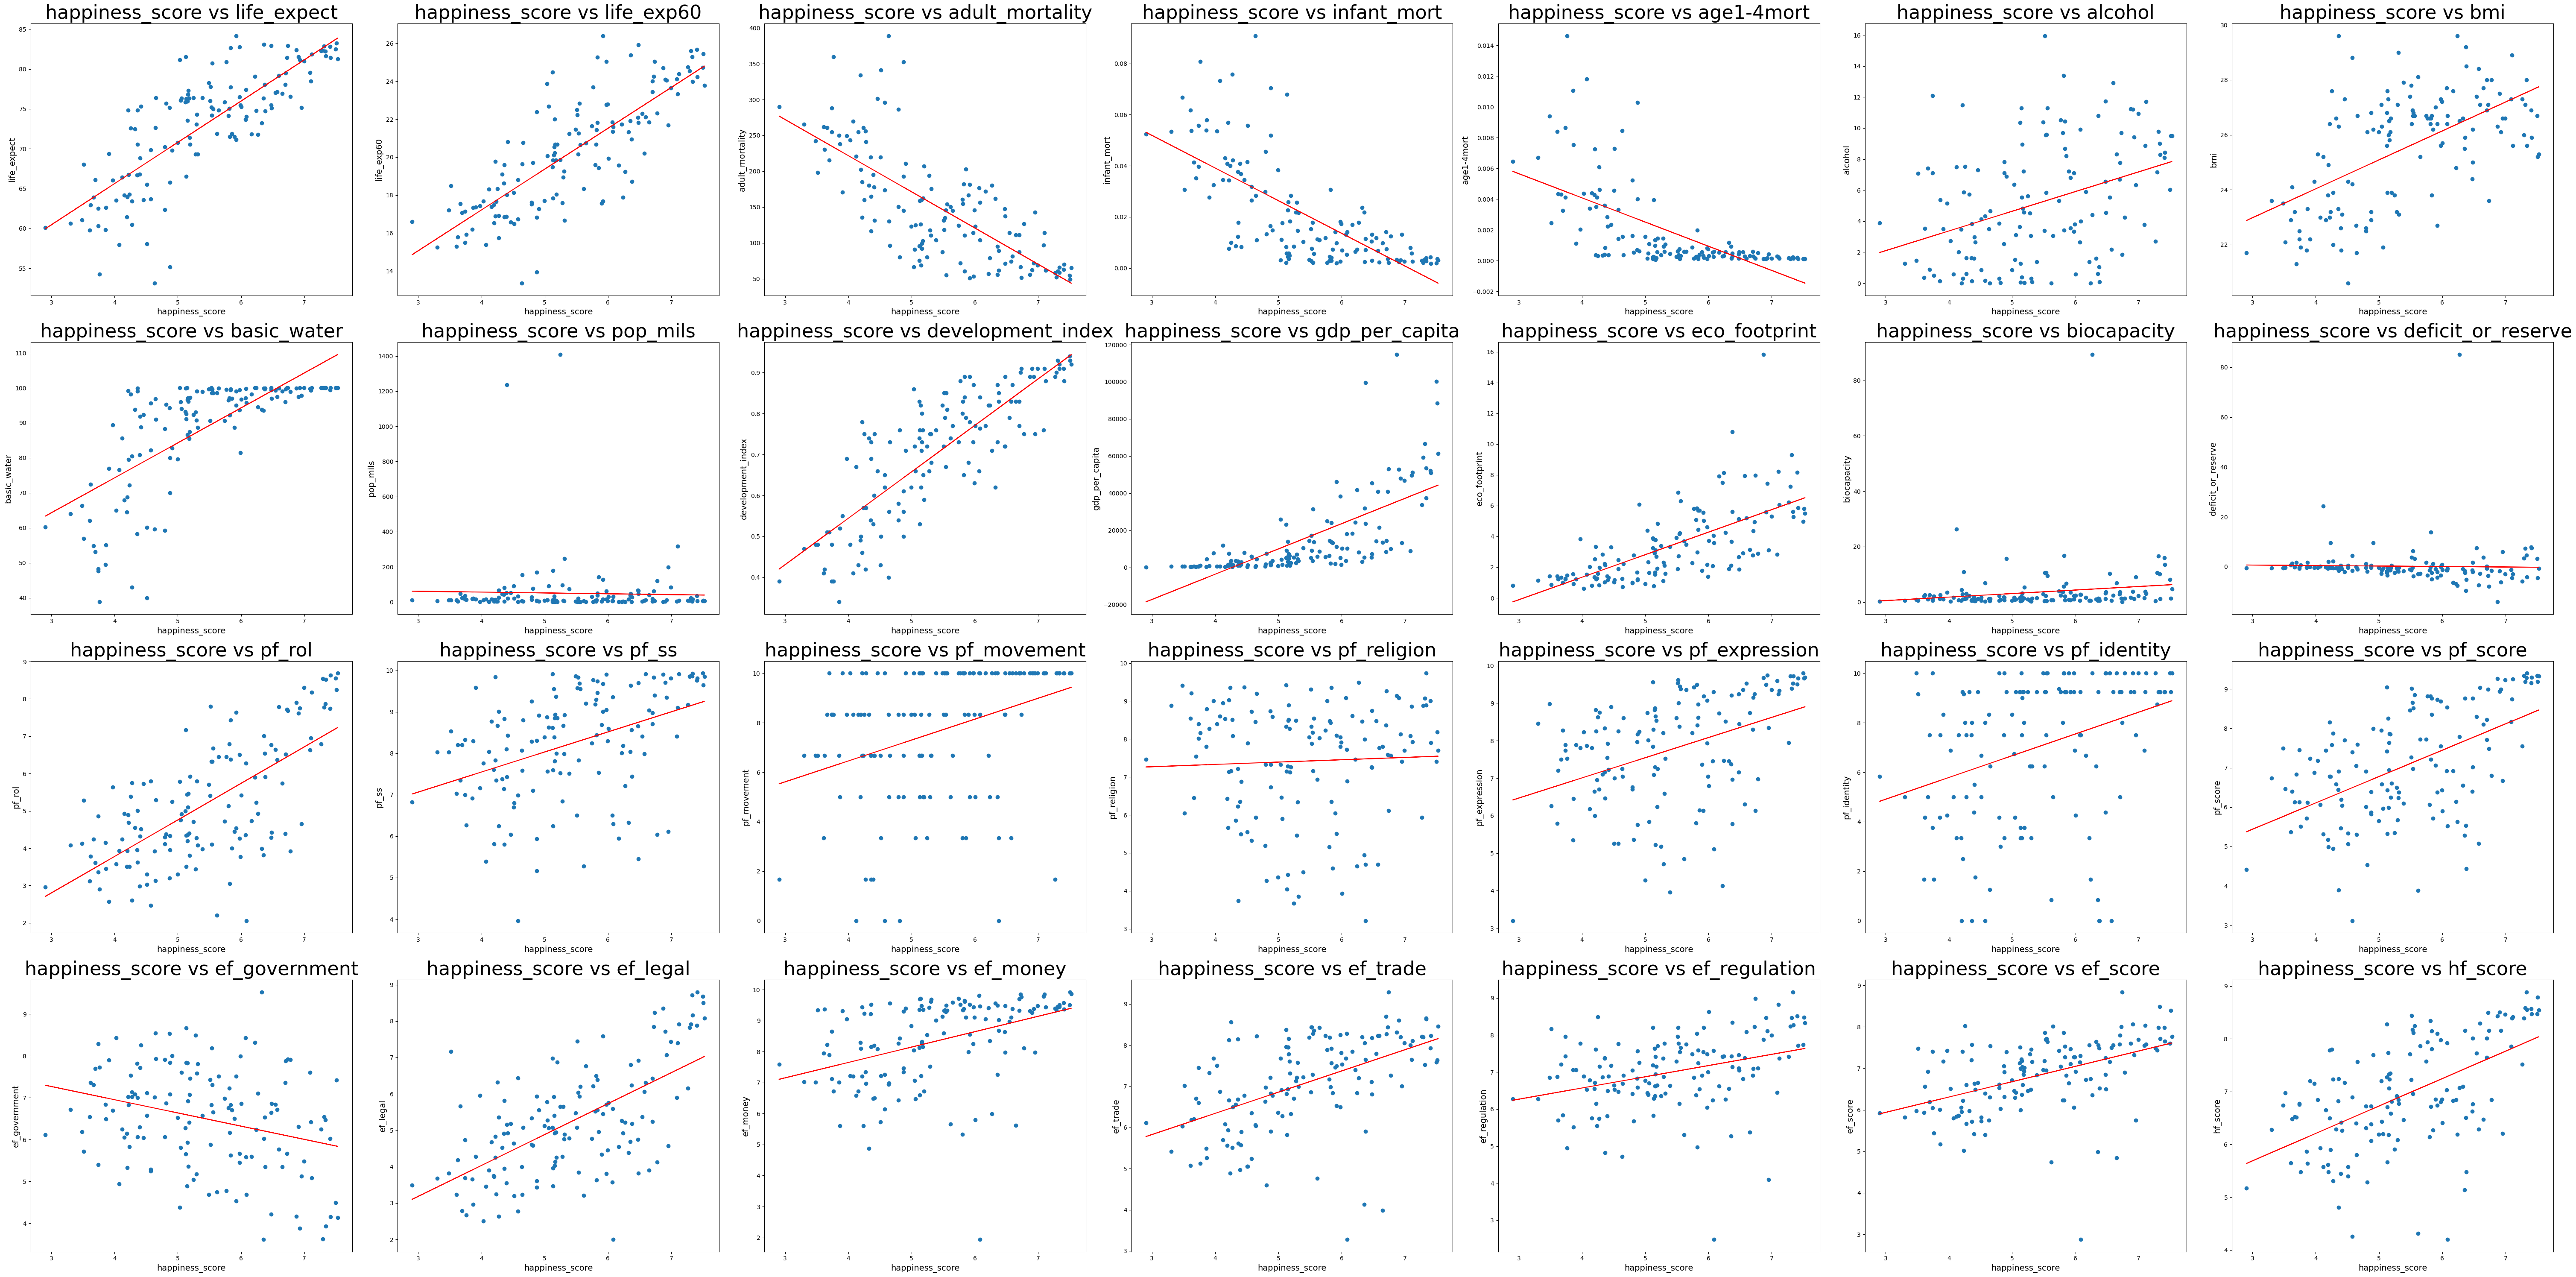

In [16]:
target_feature = "happiness_score"

fig, axs = plt.subplots(nrows=4, ncols=7, figsize=(60, 30))

for i, ax in enumerate(axs.flatten()):
    y_col = world_metrics_features.columns[i]
    x = world_metrics_features[target_feature]
    y = world_metrics_features[y_col]
    ax.scatter(x, y)
    ax.set_title(f"{target_feature} vs {y_col}", fontsize=32)
    ax.set_xlabel(target_feature, fontsize=14)
    ax.set_ylabel(y_col, fontsize=14)

    slope, intercept, r_value, p_value, std_err = stats.linregress(x, y)
    ax.plot(x, intercept + slope*x, color='r', label='Regression line')

plt.tight_layout()
plt.show()

Now let us plot the correlation heatmap:

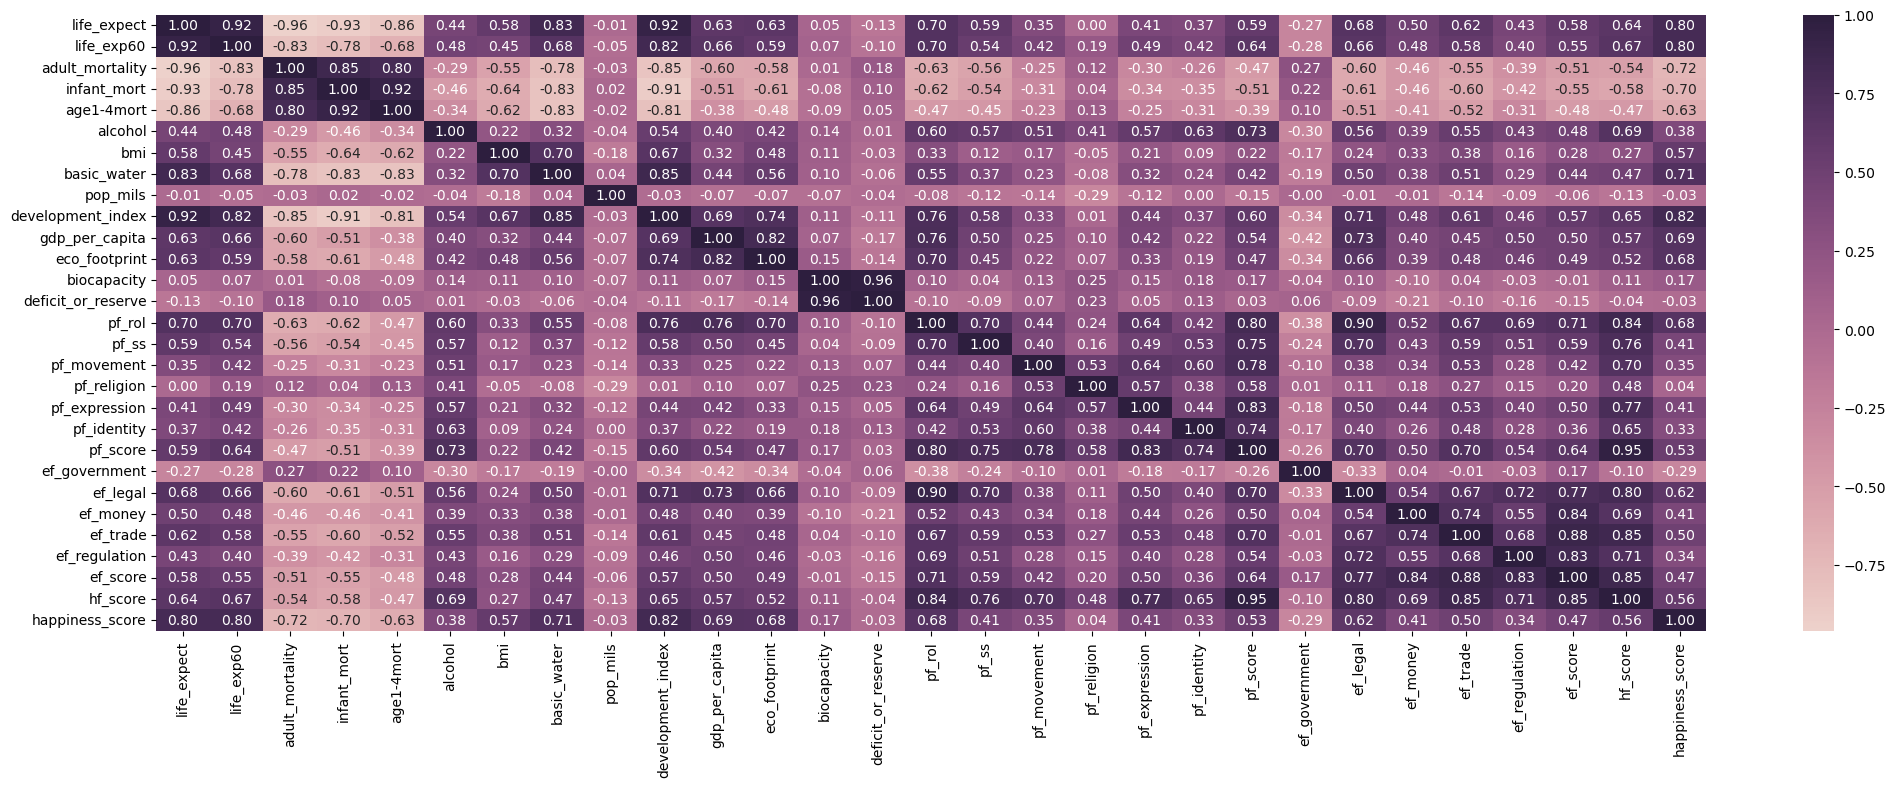

In [17]:
corr = world_metrics_features.corr()
fig, ax = plt.subplots(figsize=(25, 8))
sns.heatmap(corr, cmap=sns.cubehelix_palette(as_cmap=True), annot=True, fmt=".2f", ax=ax)
plt.show()

For the consistency, we will assume that string positive correlation is above 0.6, while the strong negative one is below -0.6.

Based on this heatmap, we could see that there are strong positive correlation between happiness score and:
- `development_index` (0.82)
- `life_expect` (0.80)
- `life_exp60` (0.80)
- `basic_water` (0.71)
- `gdp_per_capita` (0.69)
- `eco_footprint` (0.68)
- `pf_rol` (0.68)
- `ef_legal` (0.62)

Also, there are some strong negative correlation coefficients between happiness score and:
- `adult_mortality` (-0.72)
- `infant_mort` (-0.70)
- `age1-4mort` (-0.63)

So, these are the main features that we will consider in our models later. Basically, looking in the metrics that have strong negative correlation, we could see that to be happy you just need to be alive :)

We will create a separate .csv file with these metrics:

In [18]:
world_metrics_subset = world_metrics[['country', 'development_index', 'life_expect', 'life_exp60', 'basic_water', 
                                      'gdp_per_capita', 'eco_footprint', 'pf_rol', 'ef_legal',
                                      'adult_mortality', 'infant_mort', 'age1-4mort']]

world_metrics_subset

country  development_index  life_expect  life_exp60  basic_water  \
0          Angola               0.52     62.63262    17.34829     55.08428   
1         Burundi               0.39     60.09811    16.59126     60.20415   
2           Benin               0.48     61.08568    17.20543     66.32024   
3    Burkina Faso               0.39     60.32101    15.48575     48.26772   
4        Botswana               0.69     66.05297    17.42258     89.40444   
..            ...                ...          ...         ...          ...   
132   New Zealand               0.91     82.24739    25.29202    100.00000   
133         Japan               0.89     84.16616    26.39402     98.97000   
134      Cambodia               0.55     69.36723    17.36710     76.94537   
135   South Korea               0.89     82.66409    25.26966     99.67540   
136          Laos               0.56     65.79089    16.83024     79.94190   

     gdp_per_capita  eco_footprint    pf_rol  ef_legal  adult_mortality  \
0           4665.91           0.93  3.451814  2.963635        237.96940   
1            276.69           0.80  2.961470  3.495487        290.18580   
2            746.83           1.41  4.129480  3.822761        242.37410   
3            671.07           1.21  4.860575  3.687657        254.60270   
4           7743.50           3.83  5.641684  5.950516        249.24130   
..              ...            ...       ...       ...              ...   
132        37488.30           5.60  7.868546  8.715280         66.05728   
133        46201.60           5.02  7.643490  7.586987         50.82619   
134          877.64           1.21  2.566741  4.277907        170.49700   
135        24155.80           5.69  7.438183  6.391154         60.81405   
136         1236.24           1.22  3.953482  5.937201        192.79390   

     infant_mort  age1-4mort  
0       0.057900    0.007520  
1       0.052420    0.006450  
2       0.066690    0.009390  
3       0.055795    0.008635  
4       0.032560    0.002040  
..           ...         ...  
132     0.003975    0.000235  
133     0.001980    0.000195  
134     0.027600    0.001110  
135     0.002955    0.000125  
136     0.051895    0.003990  

[137 rows x 12 columns]

In [21]:
world_metrics_subset_path = "https://raw.githubusercontent.com/mivelikikh/what_makes_us_happy/main/data/world_metrics_subset.csv"
world_metrics_subset = pd.read_csv(world_metrics_subset_path)

world_metrics_subset

country  development_index  life_expect  life_exp60  basic_water  \
0          Angola               0.52     62.63262    17.34829     55.08428   
1         Burundi               0.39     60.09811    16.59126     60.20415   
2           Benin               0.48     61.08568    17.20543     66.32024   
3    Burkina Faso               0.39     60.32101    15.48575     48.26772   
4        Botswana               0.69     66.05297    17.42258     89.40444   
..            ...                ...          ...         ...          ...   
132   New Zealand               0.91     82.24739    25.29202    100.00000   
133         Japan               0.89     84.16616    26.39402     98.97000   
134      Cambodia               0.55     69.36723    17.36710     76.94537   
135   South Korea               0.89     82.66409    25.26966     99.67540   
136          Laos               0.56     65.79089    16.83024     79.94190   

     gdp_per_capita  eco_footprint    pf_rol  ef_legal  adult_mortality  \
0           4665.91           0.93  3.451814  2.963635        237.96940   
1            276.69           0.80  2.961470  3.495487        290.18580   
2            746.83           1.41  4.129480  3.822761        242.37410   
3            671.07           1.21  4.860575  3.687657        254.60270   
4           7743.50           3.83  5.641684  5.950516        249.24130   
..              ...            ...       ...       ...              ...   
132        37488.30           5.60  7.868546  8.715280         66.05728   
133        46201.60           5.02  7.643490  7.586987         50.82619   
134          877.64           1.21  2.566741  4.277907        170.49700   
135        24155.80           5.69  7.438183  6.391154         60.81405   
136         1236.24           1.22  3.953482  5.937201        192.79390   

     infant_mort  age1-4mort  happiness_score  
0       0.057900    0.007520            3.866  
1       0.052420    0.006450            2.905  
2       0.066690    0.009390            3.484  
3       0.055795    0.008635            3.739  
4       0.032560    0.002040            3.974  
..           ...         ...              ...  
132     0.003975    0.000235            7.334  
133     0.001980    0.000195            5.921  
134     0.027600    0.001110            3.907  
135     0.002955    0.000125            5.835  
136     0.051895    0.003990            4.876  

[137 rows x 13 columns]

In [22]:
vanila_subset = world_metrics_subset[['country', 'happiness_score']]
vanila_subset

country  happiness_score
0          Angola            3.866
1         Burundi            2.905
2           Benin            3.484
3    Burkina Faso            3.739
4        Botswana            3.974
..            ...              ...
132   New Zealand            7.334
133         Japan            5.921
134      Cambodia            3.907
135   South Korea            5.835
136          Laos            4.876

[137 rows x 2 columns]

In [29]:
vanila_subset_sorted = vanila_subset.sort_values('happiness_score', ascending=True)
vanila_subset_sorted

country  happiness_score
1        Burundi            2.905
11          Togo            3.303
2          Benin            3.484
15        Rwanda            3.515
29        Guinea            3.607
..           ...              ...
54        Canada            7.404
105      Finland            7.413
84        Norway            7.498
115  Switzerland            7.509
111      Denmark            7.526

[137 rows x 2 columns]

The main step is to split the set into 4 quantiles. For the consistency we will assume that countries in Q1 are the happiest states in the world, Q2 will represent countries whose citizens are satisfied with their lives, Q3 is for states whose citizens are NOT satisfied with their way of living, and Q4 is the set of unhappiest countries.

In [30]:
vanila_subset_sorted['quantile'] = pd.qcut(vanila_subset_sorted['happiness_score'], q=4, labels=False)
vanila_subset_sorted.head()

country  happiness_score  quantile
1   Burundi            2.905         0
11     Togo            3.303         0
2     Benin            3.484         0
15   Rwanda            3.515         0
29   Guinea            3.607         0

In [61]:
fig = px.scatter(vanila_subset_sorted, x='happiness_score', y='country', color='quantile', color_continuous_scale=['#2D1E3E', '#7A4977', '#BC7B99', '#E3BBBC'])

fig.update_traces(marker=dict(opacity=0.9))

fig.update_layout(
    title="Vanila Clusterisation of Countries' Happiness Scores",
    xaxis_title='Happiness Score',
    yaxis_title='Country',
    yaxis_tickfont={'size': 8},
    xaxis_tickfont={'size': 8},
    width=700,
    height=700,
)

fig.update_traces(marker=dict(size=10, line=dict(width=1, color='black'), opacity=0.8))

fig.show()

Another approach for the quintiles:

In [62]:
vanila_subset1 = world_metrics_subset[['country', 'happiness_score']]
vanila_subset_sorted1 = vanila_subset.sort_values('happiness_score', ascending=True)

# Define the bins for the quintiles
bins = [0, 2.5, 5, 7.5, 10]

# Use pd.cut() to bin the happiness_score column
vanila_subset_sorted1['quantile'] = pd.cut(vanila_subset_sorted1['happiness_score'], bins=bins, labels=False)

vanila_subset_sorted1.head()

country  happiness_score  quantile
1   Burundi            2.905         1
11     Togo            3.303         1
2     Benin            3.484         1
15   Rwanda            3.515         1
29   Guinea            3.607         1

In [64]:
quintile_counts1 = vanila_subset_sorted1['quantile'].value_counts().sort_index()
print(quintile_counts1)

1    50
2    85
3     2
Name: quantile, dtype: int64


In [67]:
fig = px.scatter(vanila_subset_sorted1, x='happiness_score', y='country', color='quantile', color_continuous_scale=['#2D1E3E', '#7A4977', '#BC7B99', '#E3BBBC'])

fig.update_traces(marker=dict(opacity=0.9))

fig.update_layout(
    title="Vanila Clusterisation of Countries' Happiness Scores",
    xaxis_title='Happiness Score',
    yaxis_title='Country',
    yaxis_tickfont={'size': 8},
    xaxis_tickfont={'size': 8},
    width=700,
    height=700,
)

fig.update_traces(marker=dict(size=10, line=dict(width=1, color='black'), opacity=0.8))

fig.show()